In [64]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Procesamiento estadístico de datos

In [65]:
data = sns.load_dataset('penguins')

In [66]:
x = data['flipper_length_mm']
y = data['bill_length_mm']

In [67]:
filt = ~(np.isnan(x) | np.isnan(y))
x = x[filt].values
y = y[filt].values

In [69]:
x,y

(array([181., 186., 195., 193., 190., 181., 195., 193., 190., 186., 180.,
        182., 191., 198., 185., 195., 197., 184., 194., 174., 180., 189.,
        185., 180., 187., 183., 187., 172., 180., 178., 178., 188., 184.,
        195., 196., 190., 180., 181., 184., 182., 195., 186., 196., 185.,
        190., 182., 179., 190., 191., 186., 188., 190., 200., 187., 191.,
        186., 193., 181., 194., 185., 195., 185., 192., 184., 192., 195.,
        188., 190., 198., 190., 190., 196., 197., 190., 195., 191., 184.,
        187., 195., 189., 196., 187., 193., 191., 194., 190., 189., 189.,
        190., 202., 205., 185., 186., 187., 208., 190., 196., 178., 192.,
        192., 203., 183., 190., 193., 184., 199., 190., 181., 197., 198.,
        191., 193., 197., 191., 196., 188., 199., 189., 189., 187., 198.,
        176., 202., 186., 199., 191., 195., 191., 210., 190., 197., 193.,
        199., 187., 190., 191., 200., 185., 193., 193., 187., 188., 190.,
        192., 185., 190., 184., 195., 

Text(0, 0.5, 'bill_length_mm')

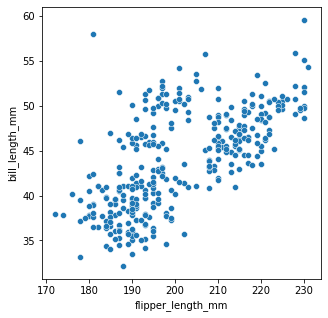

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

sns.scatterplot(x=x, y=y)

ax.set_xlabel('flipper_length_mm')
ax.set_ylabel('bill_length_mm')
#Graficamos para ver si aparentemente sí hay una relación lineal

# Covarianza

# $S_{xy} = \frac{1}{n-1}[\sum_{i=1}^n x_iy_i -n\hat{x}\hat{y}]$

La covarianza depende de la magnitud de las variables. Esta medida nos ayudan a cuantificar la relación entre dos variables.

In [70]:
n = len(x)

x_mean = x.mean()
y_mean = y.mean()

cov = ((x*y).sum() - n*x_mean*y_mean)/(n-1)
cov

50.37576529299813

In [71]:
#Este método devuelve la matriz cuadrada de covarianza. 

np.cov(x,y)


array([[197.7317916 ,  50.37576529],
       [ 50.37576529,  29.80705433]])

Para la matriz de cov se cumple que las entradas ii serán igual a la varianza de esa variable:
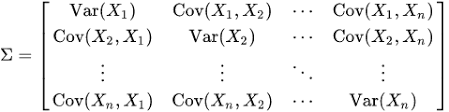

In [10]:
np.var(x)

197.15362846687864

In [11]:
np.var(y)

29.71989919975377

# Correlación de Pearson 


# $\rho_{xy}=\frac{Cov(x,y)}{\sqrt{Var(x)Var(y)}}$

A diferencia de los parámetros de dispersión, una correlación relaciona dos variables. 
Correlación: inidica si dos variables están relacionadas de forma dependiente y lineal. 
Correlación no implica causalidad

In [12]:
[-1,0, 1] #1 muy corr y -1 corr inversamente, 0 no da info

[-1, 0, 1]

In [13]:
cov/(np.sqrt(x.var()*y.var()))

0.6561813407464314

In [14]:
np.corrcoef(x, y)

array([[1.        , 0.65618134],
       [0.65618134, 1.        ]])

### Tratamiento de datos: pre procesamiento de datos


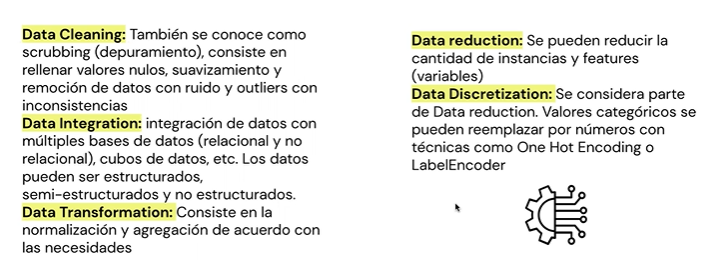

# Outliers
Un valor atípico es una observación a una distancia anormal del resto de los datos. Pueden haber dos tipos: univariado o multivariado.

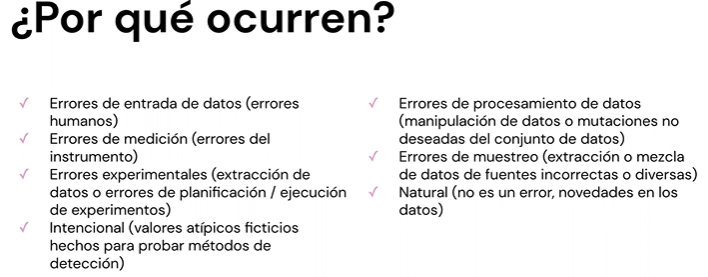

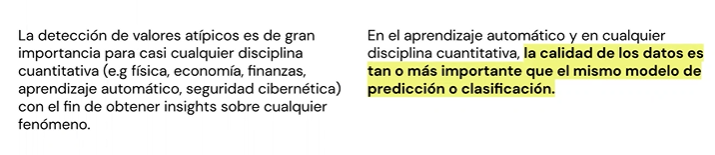

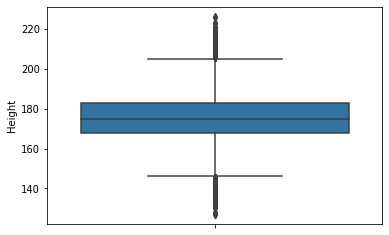

In [72]:
import pandas as pd
data = pd.read_csv('athlete_events.csv')

sns.boxplot(data=data, y='Height')

In [73]:
#Calcular primer y tercer cuartil
q1 = data['Height'].quantile(0.25)
q1

168.0

In [74]:
q3 = data['Height'].quantile(0.75)
q3

183.0

In [75]:
#Calcular rango inter cuartil
IQR = q3 - q1
IQR

15.0

In [19]:
#Encontrar el límite de arriba y abajo 
max_lim = q3 + 1.5*IQR
max_lim

205.5

In [20]:
min_lim = q1 - 1.5*IQR
min_lim

145.5

In [77]:
#Realizo un filtro que elimine todo lo que está en los límites
data[(data['Height'] < max_lim) & (data['Height'] > min_lim)]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [78]:
new_data = data[(data['Height'] < max_lim) & (data['Height'] > min_lim)]

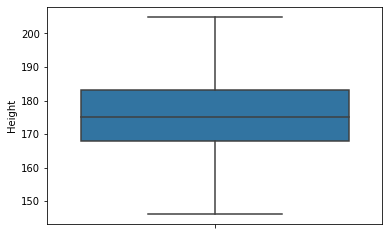

In [79]:
sns.boxplot(data=new_data, y='Height')

### Z Score

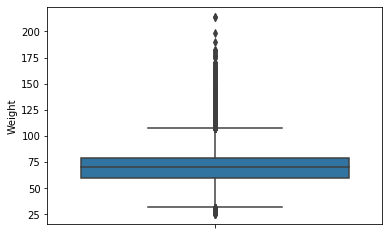

In [81]:
sns.boxplot(data=data, y='Weight')

In [82]:
mean = data['Weight'].mean()
mean

70.70239290053351

In [83]:
std = data['Weight'].std()
std

14.348019999019845

In [86]:
#normalizo mis datos 
data_normalized = (data['Weight'] - mean)/std
data_normalized

0         0.648006
1        -0.745914
2              NaN
3              NaN
4         0.787398
            ...   
271111    1.275271
271112   -0.815610
271113   -0.815610
271114    1.763143
271115    1.763143
Name: Weight, Length: 271116, dtype: float64

In [85]:
data_normalized.mean()

1.0659433375859962e-15

In [28]:
data_normalized.std()

0.9999999999999439

In [87]:
#eliminé datos arriba y abajo de 2
new_data = data_normalized[(data_normalized > -2) & (data_normalized < 2)]

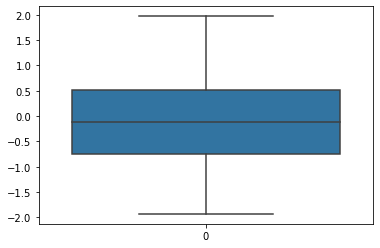

In [88]:
sns.boxplot(data = new_data)

# Multivariate outliers: distancia de Mahalanobis
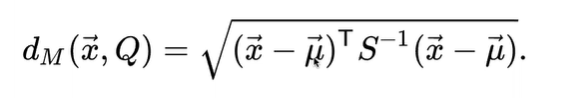
Q es la nube de datos, S es la matriz de cov y mu el vector que contiene las medias

In [132]:
new_data = data[~(data['Weight'].isna() | data['Height'].isna())]

In [133]:
new_data = new_data[['Weight', 'Height']]
new_data.head()

,Weight,Height
0,80.0,180.0
1,60.0,170.0
4,82.0,185.0
5,82.0,185.0
6,82.0,185.0


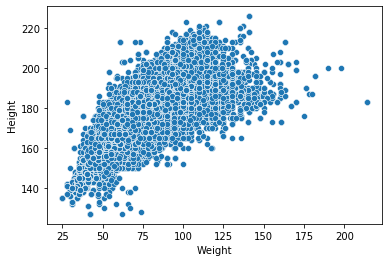

In [134]:
sns.scatterplot(data = data, x='Weight', y='Height')

In [135]:
corr= np.corrcoef(new_data["Weight"],new_data["Height"])
corr

array([[1.        , 0.79621309],
       [0.79621309, 1.        ]])

In [96]:
#Para calcular la distancia de Mahalanobis necesito las medias y la matriz de cov

In [130]:
weight_mean = new_data['Weight'].mean()
weight_mean

70.67736508535047

In [35]:
height_mean = new_data['Height'].mean()
height_mean

175.3590955896216

In [119]:
mean = np.array([weight_mean, height_mean]) #vector de l
mean

array([ 70.67736509, 175.35909559])

In [136]:
cov = np.cov(new_data['Weight'], new_data['Height'])
cov

array([[205.36029862, 120.28479455],
       [120.28479455, 111.13384632]])

In [121]:
#Calculo la matriz inversa
cov_inv = np.linalg.inv(cov)
cov_inv

array([[ 0.01330299, -0.01439838],
       [-0.01439838,  0.02458213]])

In [138]:
def distance_mahalanobis(x):
    return np.sqrt((x - mean)@cov_inv@(x-mean))

In [139]:
new_data["distance"] = new_data.apply(distance_mahalanobis,axis=1)

In [124]:
new_data

,Weight,Height,distance
0,80.0,180.0,0.663120
1,60.0,170.0,0.758181
4,82.0,185.0,0.920239
5,82.0,185.0,0.920239
6,82.0,185.0,0.920239
...,...,...,...
271111,89.0,179.0,1.694365
271112,59.0,176.0,1.428153
271113,59.0,176.0,1.428153
271114,96.0,185.0,1.945494


In [126]:
new_data['outlier'] = (new_data['distance'] > 4).astype(int)

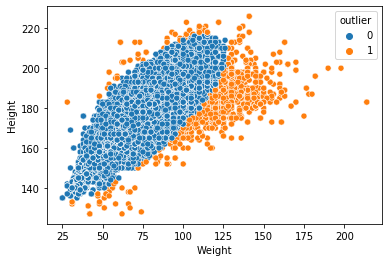

In [127]:
sns.scatterplot(data = new_data, x = 'Weight', y = 'Height', hue='outlier')